In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"breast_cancer\data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=42)
X.columns.values


array(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'Unnamed: 32'], dtype=object)


 Feature Correlation :: 



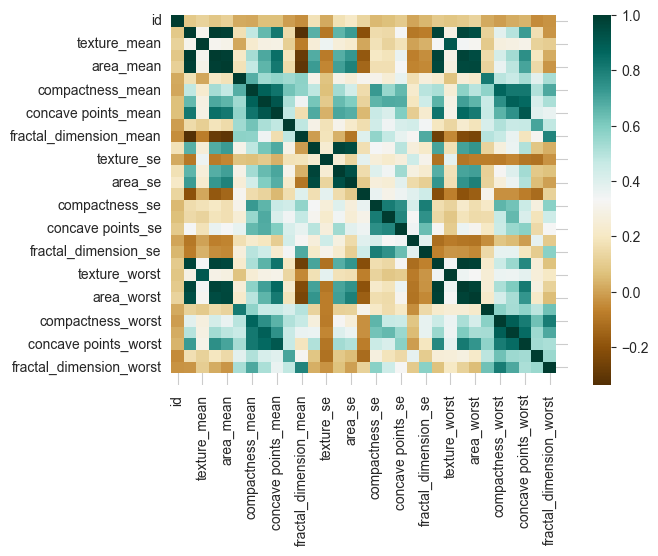

In [14]:
print("\n Feature Correlation :: \n")
g = sns.heatmap(x_train.corr(), cmap="BrBG", annot=False)

In [17]:
correlation_matrix = x_train.corr()

In [18]:
high_corr_threshold = 0.7  # For high inter-feature correlations
low_corr_threshold = 0.2  # For low correlation with target

# Find highly correlated features
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns 
                   for col2 in correlation_matrix.columns 
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > high_corr_threshold]

print(high_corr_pairs)

[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'concave points_mean'), ('radius_mean', 'area_se'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('radius_mean', 'concave points_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'radius_mean'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'concave points_mean'), ('perimeter_mean', 'area_se'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('perimeter_mean', 'concave points_worst'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('area_mean', 'concave points_mean'), ('area_mean', 'radius_se'), ('area_mean', 'perimeter_se'), ('area_mean', 'area_se'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('area_mean', 'concave points_worst'), ('smoothness_mean', 'smoothness_worst'), ('compactness_mean', 'concavity_mea

In [23]:
df.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype=object)

In [28]:
df2 = df.drop(columns=['radius_mean','perimeter_mean',
 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave points_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'perimeter_se', 
 'area_se', 'smoothness_se', 'compactness_se',
 'concavity_se', 'concave points_se', 
 'symmetry_se', 'fractal_dimension_se',
 'radius_worst', 'perimeter_worst', 
 'smoothness_worst', 'compactness_worst', 
 'concave points_worst', 'symmetry_worst',
 'fractal_dimension_worst','texture_worst', 
 'area_worst',
 'concavity_worst'], axis=1)

In [31]:
df2 = df2.drop(['Unnamed: 32', 'id'], axis=1)

In [32]:
X2 = df2.drop(columns=['diagnosis'])
Y2 = df2['diagnosis']

X2.shape, Y2.shape

((569, 3), (569,))

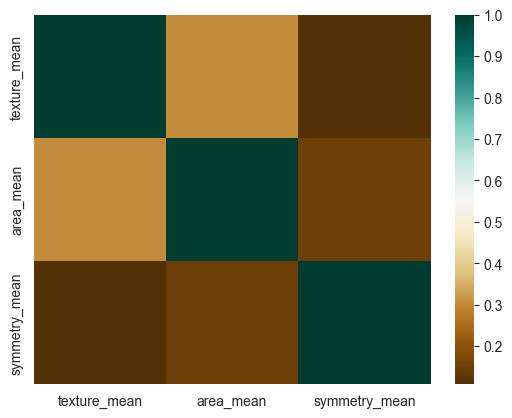

In [33]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

g = sns.heatmap(x_train2.corr(), cmap="BrBG", annot=False)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score

In [35]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)
clf.fit(x_train, y_train)
clf2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)
clf2.fit(x_train2, y_train2)

print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf.score(x_test, y_test)))



Accuracy of Decision Tree classifier on original training set: 0.96
Accuracy of Decision Tree classifier on original test set: 0.95


In [36]:
print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(x_train2, y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(x_test2, y_test2)))


Accuracy of Decision Tree classifier on reduced training set: 0.91
Accuracy of Decision Tree classifier on reduced test set: 0.90


In [44]:
from sklearn.decomposition import PCA

X = X.drop(columns='Unnamed: 32')
X3 = X
Y3 = Y
variance_pct = 0.95
pca = PCA(n_components=variance_pct)
X_transformed = pca.fit_transform(X3, Y3)

X3pca = pd.DataFrame(X_transformed)

x_train3, x_test3, y_train3, y_test3= train_test_split(X3pca, Y3, test_size=0.2, random_state=42)



In [45]:
clf3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)
clf3.fit(x_train3,y_train3)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)

In [46]:
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(x_train3, y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(x_test3, y_test3)))

Accuracy of Decision Tree classifier on PCA-transformed training set: 0.69
Accuracy of Decision Tree classifier on PCA-transformed test set: 0.62
